# Exercises on Random Walks, Coverage, Sequence Segmentation

In [1]:
import re
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate

import sys
sys.path.append('../utilities')
from load_data import load_dblp_citations, load_city_tour

## Exercise 1 - Absorbing Random Walks
Implement your own version of the absorbing random walk algorithm we discussed. Apply the algorithm in the `cit-DBLP` dataset from the [citation dataset collection](http://networkrepository.com/cit.php) in the [Network Repository](http://networkrepository.com/networks.php), which we used in the previous exercise set.

Add a universal absorbing node, with probability of absorption $\alpha$.
For each node v in the graph, compute:

1. The Personalized PageRank (PPR), with _restart probability_ $\alpha$ (same as the probability the absorbing random walk dies), of other nodes with respect to v. Note: PPR is a special case of PageRank that restarts at node $v$.
2. The Absorption Probability of an Absorbing Random Walk with $v$ as sink. Normalize these AR values so that the elements of the AR vector add up to $1$.

Compare the JS-divergence between each vector of PPR values and the corresponding vector of normalized AP values, and also for between the matrix of all PPR values and the matrix of all normalized AP values. What do you observe?

In [2]:
edges, pos = load_dblp_citations()
print("Number of edges: ", len(edges))
print("Number of nodes: ", len(pos))
print("Position example: ", pos[1])

G = nx.DiGraph()
G.add_edges_from(edges)

Number of edges:  49743
Number of nodes:  12591
Position example:  [0.03738057 0.02658339]


In [ ]:
# It turns out that there is a hell of lot of nodes with out_degree 0, so we keep removing nodes until no node is a sink node.
G_ = G.copy()
while len([n for n, o in G_.out_degree() if o == 0]) > 0: 
    G_.remove_nodes_from([n for n, o in G_.out_degree() if o == 0])
    print(len([n for n, o in G_.out_degree() if o == 0]), G_.number_of_nodes())

In [ ]:
def personalized_page_rank(G, alpha=0.85):
    p = np.zeros(G.number_of_nodes())
    # TODO YOUR CODE HERE
    return p 

In [ ]:
def absorption_probability(G, v): 
    p = np.zeros(G.number_of_nodes())
    # TODO YOUR CODE HERE
    return p

In [ ]:
def js_divergence(p1, p2):
    # TODO YOUR CODE HERE

## Exercise 2 - Coverage
You are in charge of managing online customer reviews for a travel agency. 
You aim to select a small number of $k$ customer reviews per hotel, so that the set of chosen reviews captures as many aspects of the hotel as possible. 
Assume that any hotel is characterized by $m$ features, to which one review may or may not refer. 
The reviews have been already processed, so that we know which features of a hotel a certain review refers to. 
Then, for each hotel $h$, given $N$ reviews, your task is to select $k$ reviews that capture the highest possible number of features. 
Show that there is a greedy algorithm that can perform this task with a constant approximation ratio.

## Exercise 3 - Sequence Segmentation
Eurail is designing a new collaborative schedule of itineraries between Lisbon and Stockholm. 
As part of the design, they are facing the following problem: 

We are given a sequence of $N$ cities along the itinerary. 
We need to divide this set of cities into groups of consecutive cities, such that each group contains at least $k$ cities, and the _total sum of the distances_ between the first and the last city in a group, summing over all groups, is **minimized** (note: only the first and the last city in each group matters when calculating this sum of distances).

Assume a generic distance function $dist(city_A, city_B)$ is given.

Design a scheme that quickly finds the best possible division of cities in groups under this minimization objective. 
- Try to make your algorithm as efficient as possible. 
- Provide a complexity expression for it and implement it.

In [ ]:
cities, distances = load_city_tour()
# cities is i list of city names
# distances is a distance matris, such that distances[i, j] is the distance from cities[i] to cities[j]

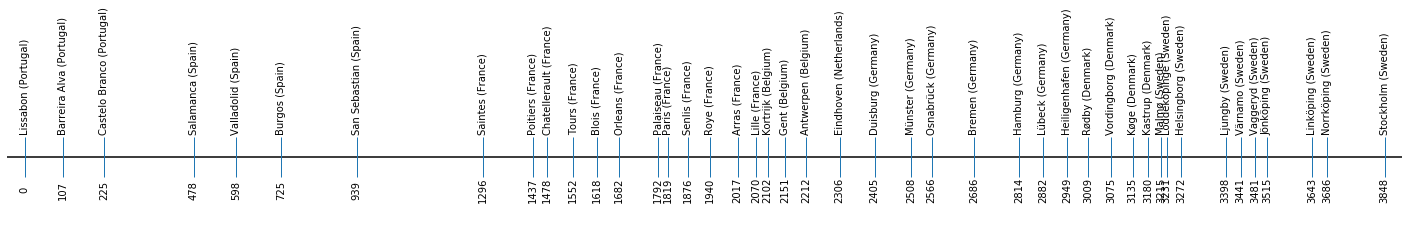

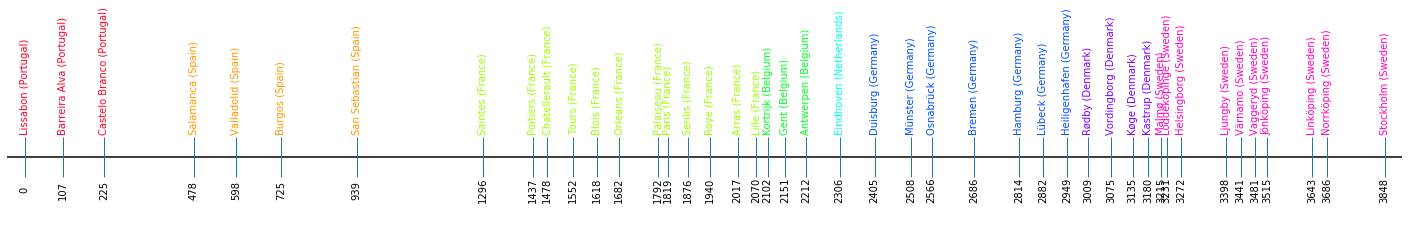

In [4]:
def plot_cities(clusters):
    """
        Function to plot partitioning of the cities.
    """
    d = distances[0]
    dmin = d.min() - 50
    dmax = d.max() + 50

    fig, ax = plt.subplots(figsize=(25,3))

    ax.hlines(1,dmin,dmax)  # Draw a horizontal line
    ax.set_xlim(dmin,dmax)
    ax.set_ylim(0.5,1.5)

    y = np.ones(np.shape(d))   # Make all y values the same
    ax.plot(d,y,'|',ms = 40)  # Plot a line at each location specified in a

    # uniques = np.unique()
    cmap = plt.get_cmap('gist_rainbow')
    uniques = np.unique(clusters)
    if len(uniques) == 1: cdict = dict.fromkeys(uniques, [0., 0., 0.])
    else: 
        cdict = {}
        for i, u in enumerate(uniques):
            cdict[u] = cmap(float(i) / (len(uniques)-1))
    
    for c, pos, cl in zip(cities, d, clusters):
        color = cdict[cl]
        ax.text(pos, 1.15, c, rotation=90, horizontalalignment='center', color=color)
        ax.text(pos, 0.80, "%.0f" % pos, rotation=90, verticalalignment='center', horizontalalignment='center', color=[0., 0., 0.])

    ax.axis('off')
    plt.show()

# Examples of how to plot clusters
# 1: Plot all clusters with same color.
plot_cities(np.zeros((len(cities),)))

# 2: Plos cities according to their country
countries = ["Portugal", "Spain", "France", "Belgium", "Netherlands", "Germany", "Denmark", "Sweden"]
country_dict = {s: i for i, s in enumerate(countries)}
# Extract country from city "name" and look up the cluster in the `country_dict`.
clusters = [country_dict[re.findall('\((\w+)\)', c)[0]] for c in cities]
 
plot_cities(clusters)

In [ ]:
def sequence_segmentation(distances, K=3):
    # TODO YOUR CODE HERE 
    return clusters

plot_cities(sequence_segmentation(cities, distances))